In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
import pandas as pd
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")

print(df.shape)
df.head()
df.info()


(5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberO

In [3]:
print("Missing values per column:")
df.isnull().sum()


Missing values per column:


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [4]:
print("Missing value percentage:")
(df.isnull().mean() * 100).round(2)


Missing value percentage:


CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [5]:
df['Churn'].value_counts(normalize=True) * 100


Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64

In [6]:
df.describe()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


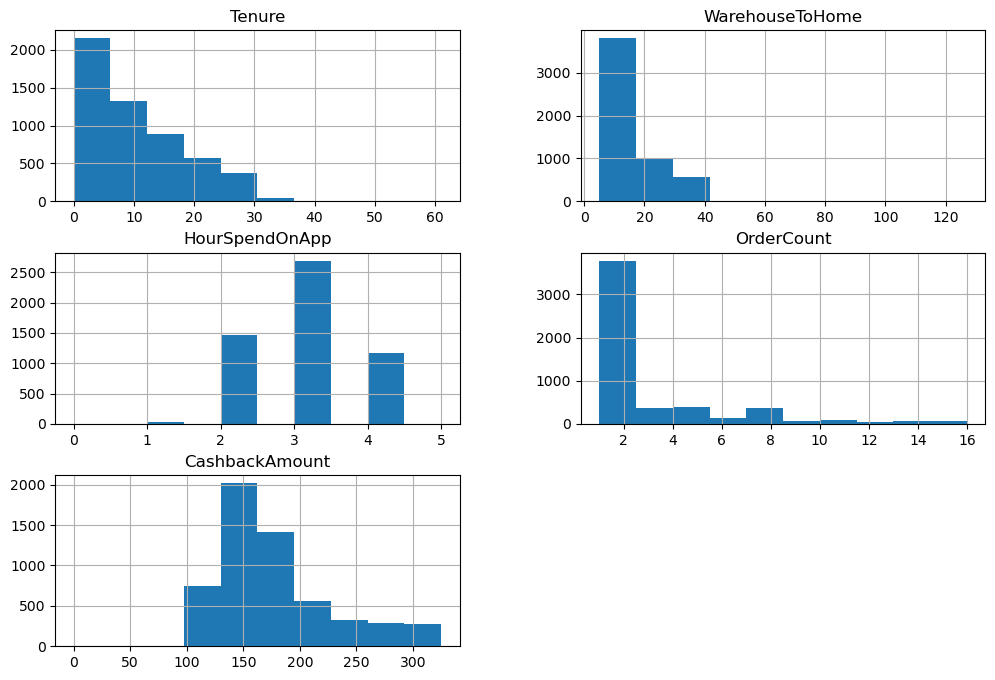

In [7]:
numeric_cols = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderCount','CashbackAmount']

df[numeric_cols].hist(figsize=(12,8))
plt.show()


In [8]:
categorical_cols = ['PreferredLoginDevice','PreferredPaymentMode','Gender',
                    'PreferedOrderCat','MaritalStatus']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for PreferredLoginDevice:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

Value counts for PreferredPaymentMode:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      3384
Female    2246
Name: count, dtype: int64

Value counts for PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

Value counts for MaritalStatus:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [9]:
key_cols = ['Tenure','SatisfactionScore','Complain','OrderCount','CashbackAmount']

for col in key_cols:
    print(f"\nMean {col} by Churn:")
    print(df.groupby('Churn')[col].mean())



Mean Tenure by Churn:
Churn
0    11.502334
1     3.379469
Name: Tenure, dtype: float64

Mean SatisfactionScore by Churn:
Churn
0    3.001282
1    3.390295
Name: SatisfactionScore, dtype: float64

Mean Complain by Churn:
Churn
0    0.234088
1    0.535865
Name: Complain, dtype: float64

Mean OrderCount by Churn:
Churn
0    3.046601
1    2.823656
Name: OrderCount, dtype: float64

Mean CashbackAmount by Churn:
Churn
0    180.635203
1    160.370928
Name: CashbackAmount, dtype: float64


In [10]:
target = "Churn"

numeric_features = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "SatisfactionScore",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

categorical_features = [
    "PreferredLoginDevice",
    "PreferredPaymentMode",
    "Gender",
    "PreferedOrderCat",
    "MaritalStatus"
]


In [11]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [12]:
X = df[numeric_features + categorical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4504, 14)
X_test shape: (1126, 14)
y_train shape: (4504,)
y_test shape: (1126,)


In [14]:
baseline_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=200, class_weight='balanced'))
])


In [15]:
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [16]:
baseline_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=300, class_weight='balanced'))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


AUC: 0.8296783625730992

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.74      0.83       936
           1       0.38      0.79      0.51       190

    accuracy                           0.75      1126
   macro avg       0.66      0.76      0.67      1126
weighted avg       0.85      0.75      0.78      1126


Confusion Matrix:
 [[691 245]
 [ 40 150]]


In [17]:
X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(16,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

nn_model.fit(X_train_nn, y_train)


In [ ]:
nn_pred_proba = nn_model.predict_proba(X_test_nn)[:, 1]

from sklearn.metrics import roc_auc_score

print("Neural Network AUC:", roc_auc_score(y_test, nn_pred_proba))


In [ ]:
baseline_auc = roc_auc_score(y_test, y_proba)
nn_auc = roc_auc_score(y_test, nn_pred_proba)

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Neural Network (MLP)"],
    "AUC Score": [baseline_auc, nn_auc]
})

comparison
